In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression , HuberRegressor , Ridge , Lasso
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error,r2_score 

from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\Linear Regression Project\Linear Regression Project\Dataset\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [67]:
df.shape #(1338, 7)

(1338, 7)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [71]:
df.duplicated().sum()

np.int64(1)

In [72]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [74]:
numerical_features = df.select_dtypes(include='number')
numerical_features

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [75]:
print(numerical_features.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [76]:
categorical_features = df.select_dtypes(exclude='number').columns
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [77]:
print(df[categorical_features].describe())

         sex smoker     region
count   1337   1337       1337
unique     2      2          4
top     male     no  southeast
freq     675   1063        364


In [78]:
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1337 non-null   object
 1   smoker  1337 non-null   object
 2   region  1337 non-null   object
dtypes: object(3)
memory usage: 41.8+ KB


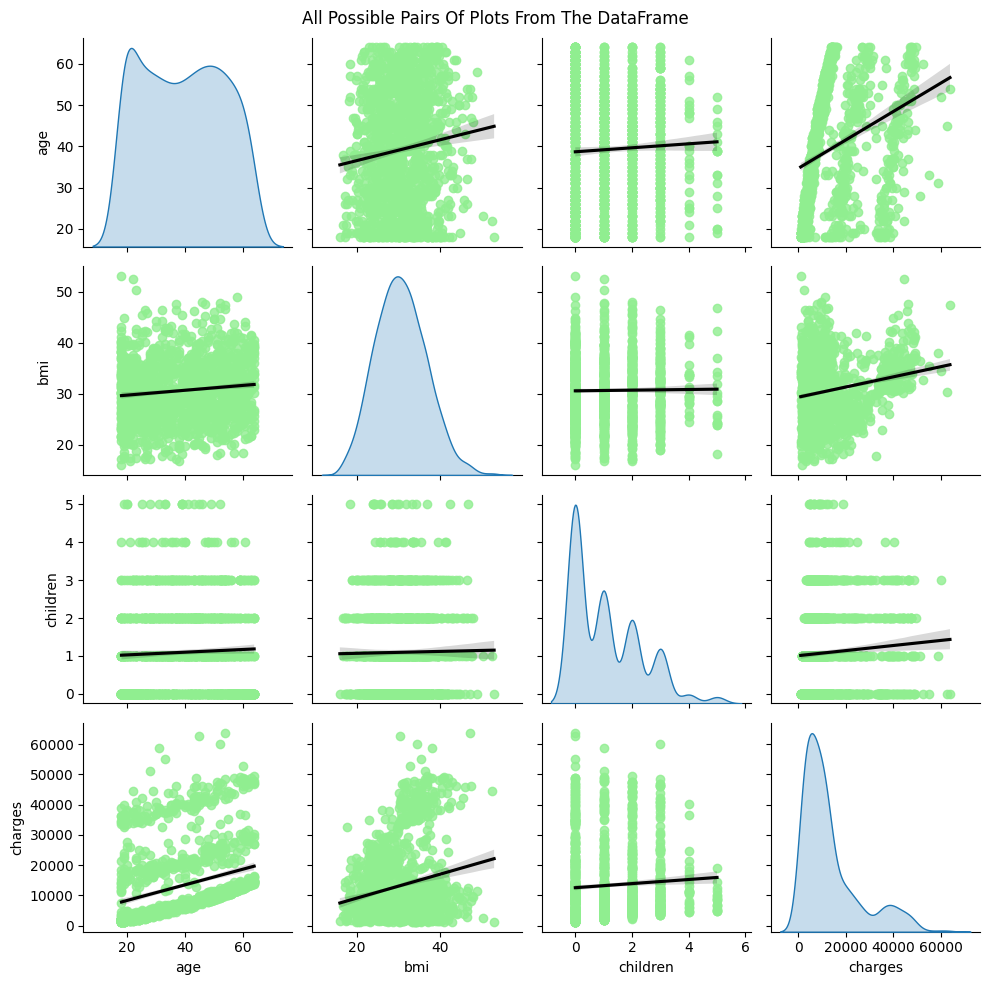

In [79]:
sns.pairplot(df , diag_kind='kde' , kind='reg' , plot_kws= {'scatter_kws' :{ 'color':'lightgreen'} , 'line_kws' : {'color' : 'black'}})
plt.suptitle('All Possible Pairs Of Plots From The DataFrame')
plt.tight_layout()
plt.show()

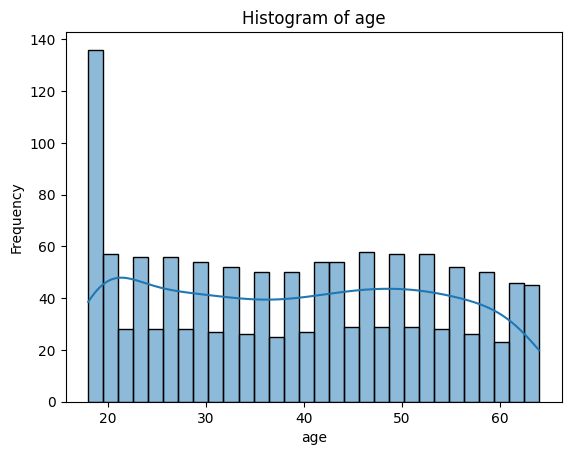

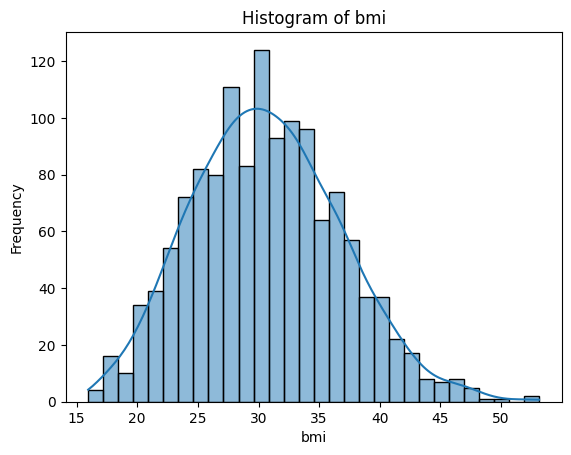

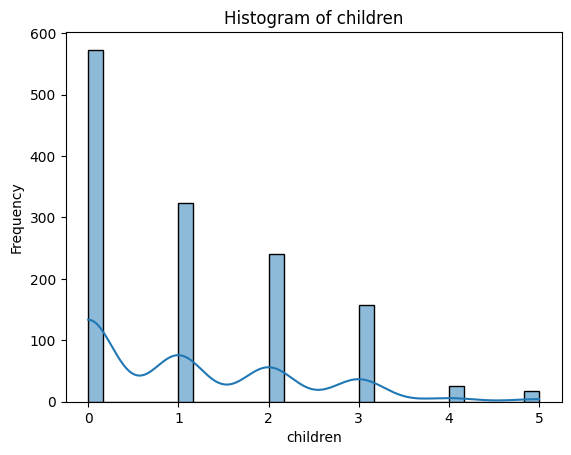

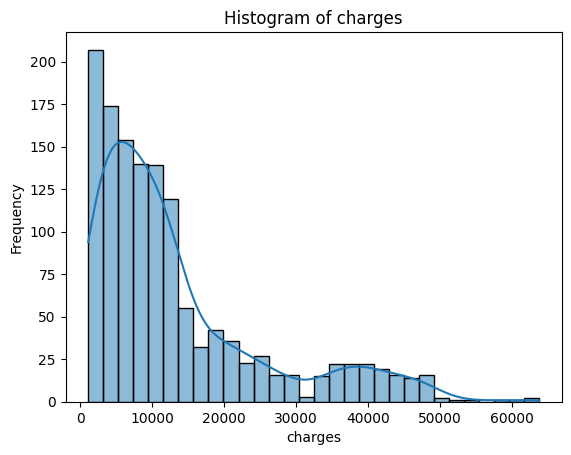

In [80]:
for col in df.select_dtypes(include='number').columns:
    sns.histplot(data=df[col] , bins= 30 , kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

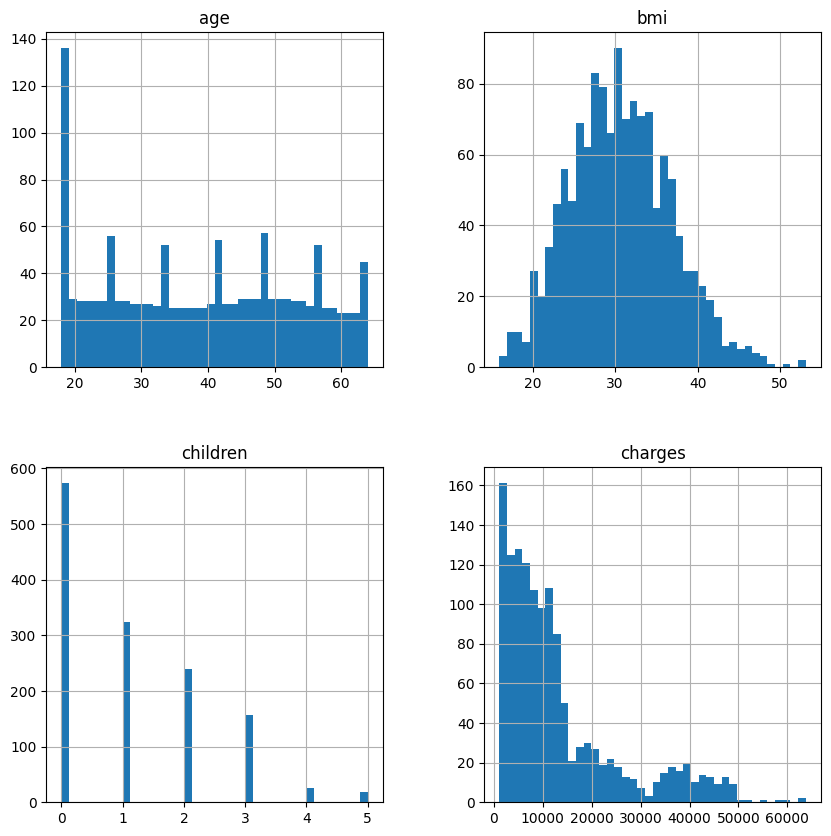

In [81]:
df.hist(bins=40 , figsize=(10,10)) #HIST A histogram plot (like sns.histplot) is designed specifically for numerical features.
plt.show()

In [82]:
# sns.displot(df['charges'] , kde = True , bins=30)
# plt.show() 

In [83]:
# sns.displot(df['bmi'] , kde = True , bins = 30)
# plt.show()

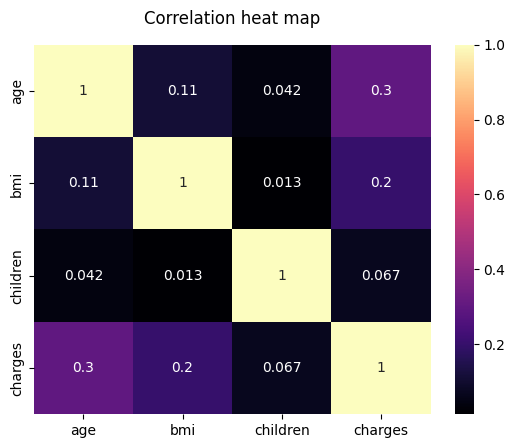

In [84]:
corr = df.corr(numeric_only=True) #CORRELATION ALWAYS RANGES IN BETWEEN THE -1 TO +1
corr
sns.heatmap(corr , annot=True , cmap='magma' )
plt.title('Correlation heat map' , pad=15)
plt.show()

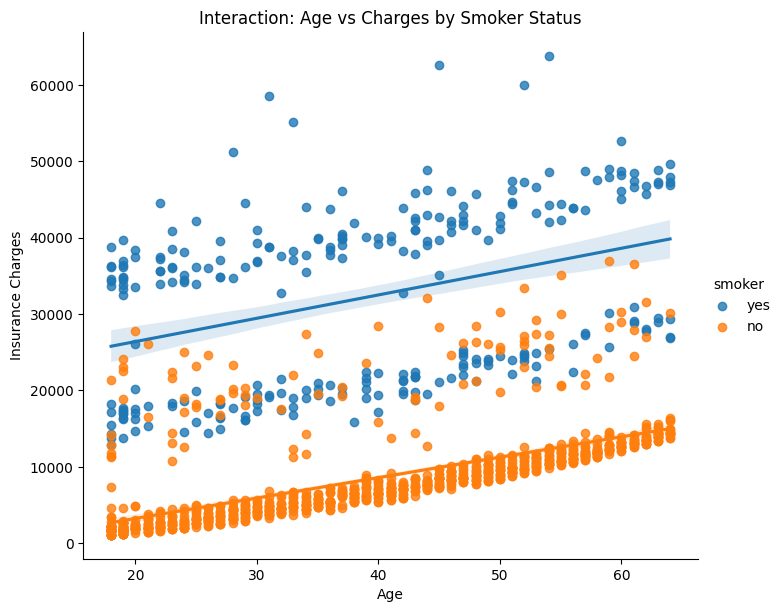

In [85]:
sns.lmplot(data=df , x = 'age' , y = 'charges' , hue='smoker' , height = 6 , aspect=1.2)
plt.title("Interaction: Age vs Charges by Smoker Status")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()


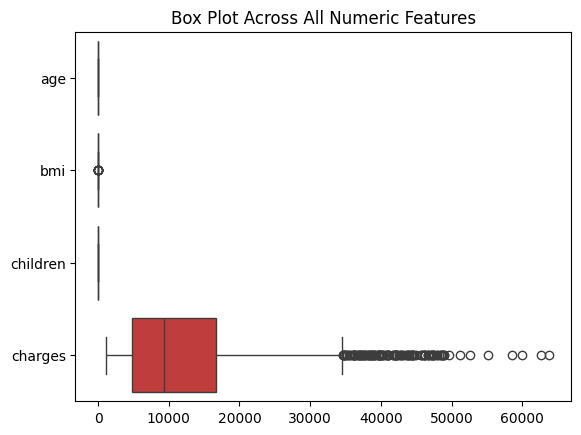

In [86]:
sns.boxplot(data= df.select_dtypes(include='number') , orient='h')
plt.title("Box Plot Across All Numeric Features")
plt.show()

In [87]:
def outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = (len(outliers) / len(df)) * 100

    return round(percentage, 3)


print("Outlier %:", outlier_percentage(df, 'charges'))

Outlier %: 10.396


In [88]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
new_df = pd.get_dummies(df , columns=['sex', 'smoker', 'region'],drop_first=True , dtype=int).copy()
new_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [90]:
X = new_df.drop('charges' , axis=1)
X  
#for scikit-learn, X = always 2D, y = 1D.
#In scikit-learn:

# Features (X) must be a 2D array (shape = (n_samples, n_features)), even if you only have one feature.

# Target (y) can be a 1D array (shape = (n_samples,)).

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [91]:
Y = new_df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [92]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1114,23,24.510,0,1,0,0,0,0
968,21,25.745,2,1,0,0,0,0
599,52,37.525,2,0,0,1,0,0
170,63,41.470,0,1,0,0,1,0
275,47,26.600,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1096,51,34.960,2,0,1,0,0,0
1131,27,45.900,2,1,0,0,0,1
1295,20,22.000,1,1,0,0,0,1
861,38,28.000,3,0,0,0,0,1


In [93]:
LR_MODEL = LinearRegression()
LR_MODEL.fit(x_train , y_train)
y_pred = LR_MODEL.predict(x_test)
y_pred

array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149578e+03,  1.20802337e+04,
        3.12447687e+04,  

In [94]:
#RMSE and R2 score MODEL PERFORMANCE EVALUATION 
RMSE_LR = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"ROOT MEAN SQUARED ERROR : {RMSE_LR:.4f}")
r_score1 = r2_score(y_test , y_pred)
print(f"R^2 SCORE : {r_score1:.4f}")


ROOT MEAN SQUARED ERROR : 5956.3429
R^2 SCORE : 0.8069


In [95]:
#RESIDUAL ERROR 
residual_error = pd.DataFrame({
    'Actual_values' : y_test.values , 
    'Predicted_values' : y_pred,
    'Residual_Errorvalue' : y_test.values - y_pred
})
residual_error

,Actual_values,Predicted_values,Residual_Errorvalue
0,8688.85885,8143.693884,545.164966
1,5708.86700,5737.115683,-28.248683
2,11436.73815,14369.314876,-2932.576726
3,38746.35510,31745.513636,7000.841464
4,4463.20510,8962.386657,-4499.181557
...,...,...,...
263,13831.11520,16753.406458,-2922.291258
264,13887.20400,15274.565769,-1387.361769
265,3925.75820,6454.699355,-2528.941155
266,47403.88000,38467.156720,8936.723280


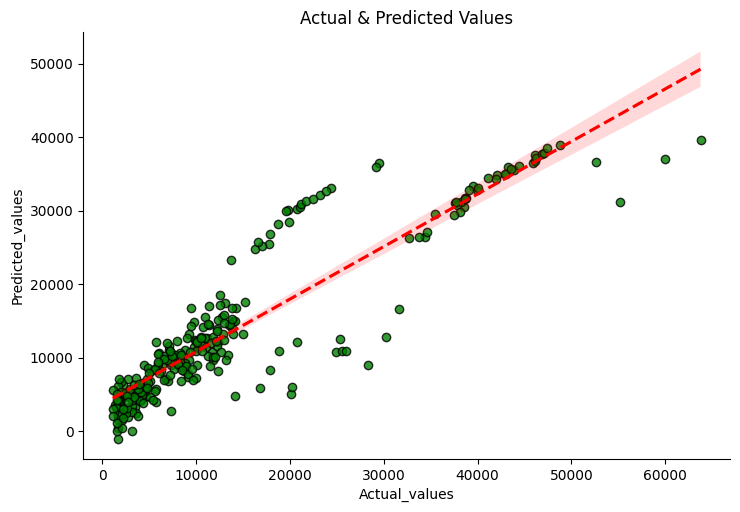

In [96]:
sns.lmplot(data=residual_error , x = 'Actual_values' , y = 'Predicted_values' , height=5 , aspect=1.5 , 
           scatter_kws={'color' : 'green' , 'edgecolor' : 'black'} ,
           line_kws={'color' :"red" , 'ls' : '--'})
plt.title('Actual & Predicted Values')
plt.show()

In [97]:
LR_MODEL.feature_names_in_

array(['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [98]:
sample = pd.DataFrame({
    'age': [35],
    'bmi': [28],
    'children': [2],
    'sex_male': [1], 
    'smoker_yes': [1],         # 1 = smoker, 0 = non-smoker
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [0],
})

predict_charge = LR_MODEL.predict(sample)
print(f'Predicted Charge For A Sample : {predict_charge[0]:.2f}/-')

Predicted Charge For A Sample : 30560.61/-


LINEAR REGRESSION MODEL COMPLETED 1

In [99]:
df_ols = new_df.copy()
df_ols

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [100]:
df_ols['charges_log'] = np.log(df_ols['charges']+1e-8)
df_ols

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges_log
0,19,27.900,0,16884.92400,0,1,0,0,1,9.734176
1,18,33.770,1,1725.55230,1,0,0,1,0,7.453302
2,28,33.000,3,4449.46200,1,0,0,1,0,8.400538
3,33,22.705,0,21984.47061,1,0,1,0,0,9.998092
4,32,28.880,0,3866.85520,1,0,1,0,0,8.260197
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,9.268661
1334,18,31.920,0,2205.98080,0,0,0,0,0,7.698927
1335,18,36.850,0,1629.83350,0,0,0,1,0,7.396233
1336,21,25.800,0,2007.94500,0,0,0,0,1,7.604867


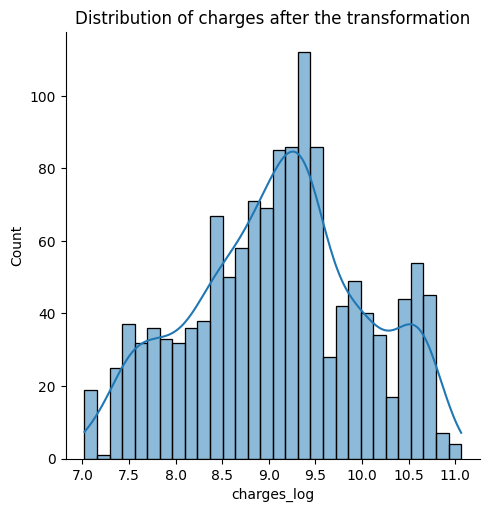

In [101]:
sns.displot(df_ols['charges_log'] , kde = True , bins = 30)
plt.title('Distribution of charges after the transformation')
plt.show()

In [102]:
X = df_ols.drop(columns=['charges','charges_log'] , axis = 1)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [103]:
Y = df_ols['charges_log']
Y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges_log, Length: 1337, dtype: float64

In [104]:
x_train , x_test ,y_train_ols ,y_test_ols = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [105]:
#FOR OLS ADD AN INTERCEPT FOT X_TRAIN ANAD X_TEST
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

In [106]:
OLS_MODEL = sm.OLS(y_train_ols, x_train_sm).fit()
OLS_MODEL


In [107]:
OLS_MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     396.7
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          1.83e-312
Time:                        17:51:45   Log-Likelihood:                -671.72
No. Observations:                1069   AIC:                             1361.
Df Residuals:                    1060   BIC:                             1406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0520      0.083     84.850      0.000       6.889       7.215
age                  0.0340      0.001     33.744      0.000       0.032       0.036
bmi                  0.0131      0.002      5.417      0.000       0.008       0.018
children             0.0992      0.012      8.479      0.000       0.076       0.122
sex_male            -0.0768      0.028     -2.740      0.006      -0.132      -0.022
smoker_yes           1.5375      0.035     43.762      0.000       1.469       1.606
region_northwest    -0.0437      0.040     -1.088      0.277      -0.122       0.035
region_southeast    -0.1286      0.041     -3.157      0.002      -0.209      -0.049
region_southwest    -0.1013      0.040     -2.516      0.012      -0.180      -0.022
==============================================================================
Omnibus:                      375.882   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.133
Skew:                           1.701   Prob(JB):                    7.99e-288
Kurtosis:                       7.256   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
y_pred_ols = OLS_MODEL.predict(x_test_sm)
y_pred_ols


900      8.937123
1064     8.669975
1256     9.518151
298     10.272693
237      8.603676
          ...    
534      9.554715
542      9.542548
760      8.452999
1284    11.061780
1285     8.969662
Length: 268, dtype: float64

In [109]:
y_pred_original = np.exp(y_pred_ols)
y_pred_original

900      7609.272937
1064     5825.353586
1256    13604.435393
298     28931.686401
237      5451.662447
            ...     
534     14111.066833
542     13940.429408
760      4689.112786
1284    63689.794408
1285     7860.945430
Length: 268, dtype: float64

In [110]:
OLS_MODEL.fittedvalues #THE DATA THAT US FITTED IN THE REGRESSION LINE

1114     8.079442
968      8.226025
599      9.467970
170      9.533736
275      9.197981
          ...    
1096    10.981409
1131     8.593790
1295     7.942362
861      8.908337
1127     8.783191
Length: 1069, dtype: float64

In [111]:
#MODEL PERFORMANCE METRICS EVALUATION
RMSE = np.sqrt(mean_squared_error(y_test_ols , y_pred_ols))
print(f"ROOT MEAN SQUARED ERROR FOR OLS MODEL : {RMSE:.4f}")
RMSE_ORIGINAL = np.sqrt(mean_squared_error(np.exp(y_test_ols), np.exp(y_pred_ols)))
print(f"ROOT MEAN SQUARED ERROR FOR OLS MODEL : {RMSE_ORIGINAL:.4f}")


r_score2 = r2_score(np.exp(y_test_ols), np.exp(y_pred_ols))
print(f"R SQUARED : {r_score2:.4f}")

ROOT MEAN SQUARED ERROR FOR OLS MODEL : 0.3979
ROOT MEAN SQUARED ERROR FOR OLS MODEL : 7197.9653
R SQUARED : 0.7180


In [112]:
y_test_ols_original = np.exp(y_test_ols)
y_pred_original = np.exp(y_pred_ols)
residual_error_ols = pd.DataFrame({
    'Actual_values' : y_test_ols_original.values,
    "Predicted_values": y_pred_original,
    'Residual_Errorvalues' : y_test_ols_original.values - y_pred_original
}).reset_index(drop=True)
residual_error_ols

,Actual_values,Predicted_values,Residual_Errorvalues
0,8688.85885,7609.272937,1079.585913
1,5708.86700,5825.353586,-116.486586
2,11436.73815,13604.435393,-2167.697243
3,38746.35510,28931.686401,9814.668699
4,4463.20510,5451.662447,-988.457347
...,...,...,...
263,13831.11520,14111.066833,-279.951633
264,13887.20400,13940.429408,-53.225408
265,3925.75820,4689.112786,-763.354586
266,47403.88000,63689.794408,-16285.914408


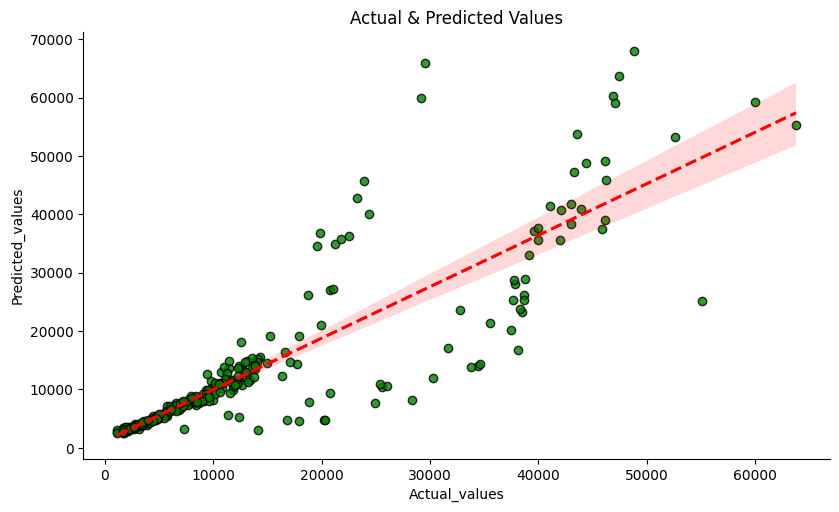

In [113]:
sns.lmplot(data=residual_error_ols , x='Actual_values' , y = 'Predicted_values' , 
           scatter_kws= {"color" : 'green' , 'edgecolor' : 'black'},
           line_kws={'ls' : '--' , 'color' : 'red'} , height=5 , aspect=1.7)
plt.title('Actual & Predicted Values')
plt.show()

OLS MODEL 2 COMPLETED


In [114]:
x_train , x_test ,y_train_reg , y_test_reg = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [115]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 


In [116]:
LASSO_MODEL = Lasso(alpha=0.01)
LASSO_MODEL.fit(x_train_scaled , y_train_reg)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [117]:
RIDGE_MODEL = Ridge(alpha=1.0)
RIDGE_MODEL.fit(x_train_scaled , y_train_reg)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [118]:
y_pred_LASSO_MODEL = LASSO_MODEL.predict(x_test_scaled)
# y_pred_lasso_model

In [119]:
y_pred_ridge_model = RIDGE_MODEL.predict(x_test_scaled)
# y_pred_ridge_model

In [120]:
#MODEL PERFORMANCE METRICS EVALUATION
RMSE = np.sqrt(mean_squared_error(y_test_reg , y_pred_LASSO_MODEL))
print(f"ROOT MEAN SQUARED ERROR FOR LASSO MODEL : {RMSE:.4f}")
RMSE_ORIGINAL_LASSO = np.sqrt(mean_squared_error(np.exp(y_test_reg),np.exp(y_pred_LASSO_MODEL)))
print(f"ROOT MEAN SQUARED ERROR FOR LASSO MODEL : {RMSE_ORIGINAL_LASSO:.4f}")


r_score3 = r2_score(np.exp(y_test_reg),np.exp(y_pred_LASSO_MODEL))
print(f"R SQUARED : {r_score3:.4f}")

ROOT MEAN SQUARED ERROR FOR LASSO MODEL : 0.4048
ROOT MEAN SQUARED ERROR FOR LASSO MODEL : 7111.3855
R SQUARED : 0.7248


In [121]:
#MODEL PERFORMANCE METRICS EVALUATION
RMSE = np.sqrt(mean_squared_error(y_test_reg , y_pred_ridge_model))
print(f"ROOT MEAN SQUARED ERROR FOR RIDGE MODEL : {RMSE:.4f}")
RMSE_ORIGINAL_RIDGE = np.sqrt(mean_squared_error(np.exp(y_test_reg),np.exp(y_pred_ridge_model)))
print(f"ROOT MEAN SQUARED ERROR FOR RIDGE MODEL : {RMSE_ORIGINAL_RIDGE:.4f}")

r_score4 = r2_score(np.exp(y_test_reg),np.exp(y_pred_ridge_model))
print(f"R SQUARED : {r_score4:.4f}")

ROOT MEAN SQUARED ERROR FOR RIDGE MODEL : 0.3980
ROOT MEAN SQUARED ERROR FOR RIDGE MODEL : 7188.7602
R SQUARED : 0.7188


In [122]:
y_test_reg_original = np.exp(y_test_reg)
y_pred_lasso_model_original = np.exp(y_pred_LASSO_MODEL)
residual_error_lasso = pd.DataFrame({
    'Actual_values' : y_test_reg_original.values,
    "Predicted_values": y_pred_lasso_model_original,
    'Residual_Errorvalues' : y_test_reg_original.values - y_pred_lasso_model_original
})
residual_error_lasso

,Actual_values,Predicted_values,Residual_Errorvalues
0,8688.85885,7580.973732,1107.885118
1,5708.86700,5866.455843,-157.588843
2,11436.73815,13037.818660,-1601.080510
3,38746.35510,28002.443587,10743.911513
4,4463.20510,5555.663746,-1092.458646
...,...,...,...
263,13831.11520,14264.687133,-433.571933
264,13887.20400,13921.456237,-34.252237
265,3925.75820,4422.402690,-496.644490
266,47403.88000,62365.985498,-14962.105498


In [123]:
y_test_reg_original = np.exp(y_test_reg)-1e-8
y_pred_ridge_model_original = np.exp(y_pred_ridge_model)-1e-8
residual_error_ridge = pd.DataFrame({
    'Actual_values' : y_test_reg_original.values,
    "Predicted_values": y_pred_ridge_model_original,
    'Residual_Errorvalues' : y_test_reg_original.values - y_pred_ridge_model_original
})
residual_error_ridge

,Actual_values,Predicted_values,Residual_Errorvalues
0,8688.85885,7609.365951,1079.492899
1,5708.86700,5828.145084,-119.278084
2,11436.73815,13599.285185,-2162.547035
3,38746.35510,28900.877909,9845.477191
4,4463.20510,5455.332467,-992.127367
...,...,...,...
263,13831.11520,14106.883178,-275.767978
264,13887.20400,13935.266805,-48.062805
265,3925.75820,4691.309549,-765.551349
266,47403.88000,63571.823053,-16167.943053


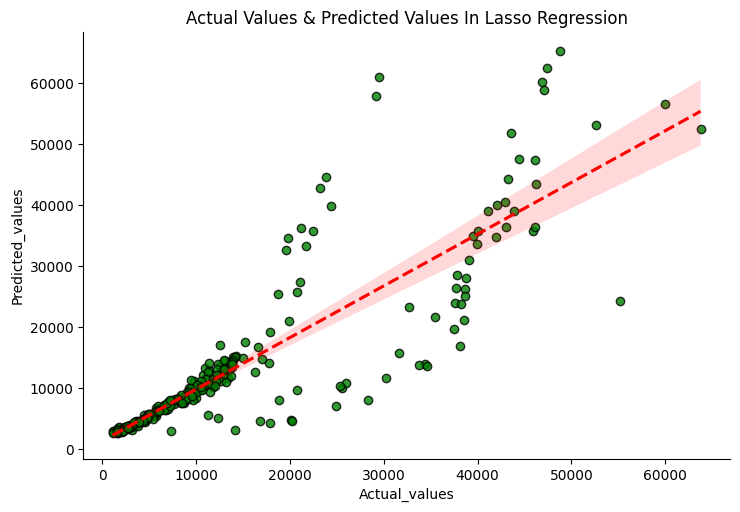

In [124]:
sns.lmplot(data=residual_error_lasso , x = 'Actual_values' , y = 'Predicted_values' , 
           scatter_kws= {'color' : 'green' , 'edgecolor' : 'black'} , 
            line_kws={'ls' : '--' , 'color' : 'red'} , height=5 , aspect=1.5)
plt.title('Actual Values & Predicted Values In Lasso Regression')
plt.show()

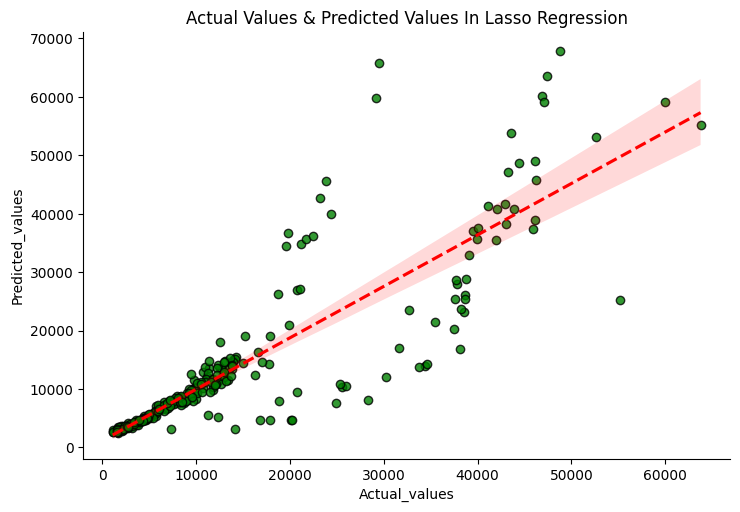

In [125]:
sns.lmplot(data=residual_error_ridge , x = 'Actual_values' , y = 'Predicted_values' , 
           scatter_kws= {'color' : 'green' , 'edgecolor' : 'black'} , 
            line_kws={'ls' : '--' , 'color' : 'red'} , height=5 , aspect=1.5)
plt.title('Actual Values & Predicted Values In Lasso Regression')
plt.show()

In [126]:
performance_comparison = pd.DataFrame({
    'Model Performance' : ['LR_MODEL' , 'OLS_MODEL' , 'LASSO_MODEL' , 'RIDGE_MODEL'],
    'RMSE' : [RMSE_LR , RMSE_ORIGINAL , RMSE_ORIGINAL_LASSO , RMSE_ORIGINAL_RIDGE],
    'R SCORE' : [r_score1,r_score2,r_score3,r_score4]
})

performance_comparison

,Model Performance,RMSE,R SCORE
0,LR_MODEL,5956.342894,0.806929
1,OLS_MODEL,7197.965302,0.718046
2,LASSO_MODEL,7111.385540,0.724788
3,RIDGE_MODEL,7188.760165,0.718767


In [127]:
performance_comparison.max()

Model Performance    RIDGE_MODEL
RMSE                 7197.965302
R SCORE                 0.806929
dtype: object

C:\Users\Chinna Joka\AppData\Local\Temp\ipykernel_14944\3948387239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model Performance", y="RMSE", data=performance_comparison, ax=axes[0] , palette=colors)
C:\Users\Chinna Joka\AppData\Local\Temp\ipykernel_14944\3948387239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model Performance", y="R SCORE", data=performance_comparison, ax=axes[1] , palette=colors)


Text(0, 0.5, 'R²')

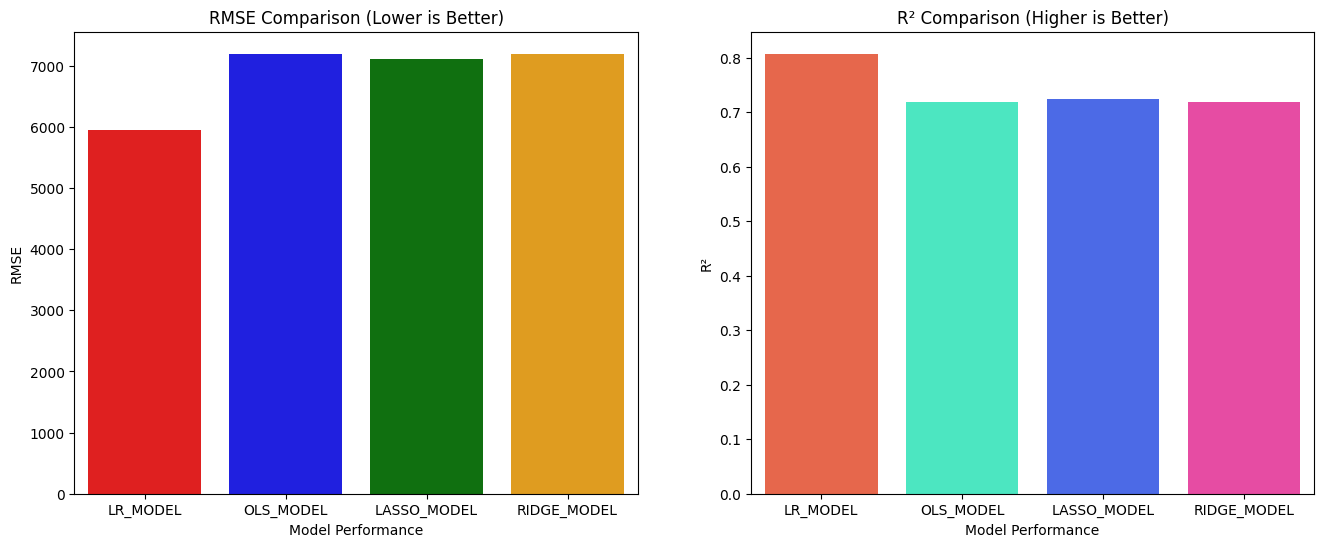

In [128]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

# 1) RMSE bar
colors = ['red', 'blue', 'green', 'orange']
sns.barplot(x="Model Performance", y="RMSE", data=performance_comparison, ax=axes[0] , palette=colors)
axes[0].set_title("RMSE Comparison (Lower is Better)")
axes[0].set_ylabel("RMSE")

# 2) R² bar
colors = ['#FF5733', '#33FFCE', '#335BFF', '#FF33A6']
sns.barplot(x="Model Performance", y="R SCORE", data=performance_comparison, ax=axes[1] , palette=colors)
axes[1].set_title("R² Comparison (Higher is Better)")
axes[1].set_ylabel("R²")